<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

В проекте будет предложена модель, которая наиболее точно позволит предсказать вероятность потери банком клиента. 
Для построения модели потребуется выполнить следующие шаги:
1) Изучить и подготовить данные для обучения, проверки и тестирования

2) Исследовать различные классификационные модели на основе логической регрессии, алгоритма решающего дерева и случайного леса

3) Оптимизировать обучающую выборку путем компенсации дисбаланса классов

4) Протестировать наилучшую модель на тестовой выборке

In [2]:
# импортируем библиотеки, модели, функции и метрики, которые потребуются для выполнения проекта

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Подготовка данных

In [3]:
data = pd.read_csv('./Churn.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Датасет состоит из 14 параметров и 10000 случаев. Один из параметров Tenure содержит значения типа NaN. Значения типа NaN необходимо исключить, чтобы данные возможно было использовать для построения модели.

In [4]:
data['Tenure'].unique() # выведем уникальные значения парамерта Tenure

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [5]:
data = data.dropna() # исключим данные со значением типа NaN
data.shape

(10000, 14)

In [6]:
data['Tenure'] = data['Tenure'].astype(int) # преобразуем оставшиеся значения в целочисленные
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [7]:
data.dtypes # оценим типы данных

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# выделим признаки и целевой признак, при этом также исключиим параметры, которые не требуются для построения модели (RowNumber, CustomerID, Surname)

features = data.drop(['Exited','RowNumber','CustomerId','Surname'], axis=1) 
target = data['Exited']

print(features.shape)
print(target.shape)

(10000, 10)
(10000,)


In [9]:
# преобразуем категориальные признаки в численные техникой ohe

features_ohe = pd.get_dummies(features, drop_first=True)
features_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
# разделим данные на обучающую, валидационную и тестовую выборки

features_train, features_valid_test, target_train, target_valid_test = train_test_split(features_ohe, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

In [11]:
# выполним масштабирование численных параметров методом стандартизации, функция StandardScaler

numeric = ['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


Вывод: Данные подготовлены для создания классификационной модели, которая позволит предсказать уйдет или останется клиент в банке. Значения типа NaN удалены, категориальные признаки преобразованы техникой ohe, численные признаки стандартизованы. Данные разбиты на обучающую, валидационную и тестовую выборки.

## Исследование задачи

Матрица ошибок:
[[1506   76]
 [ 319   99]]
Точность:  0.5657142857142857
Полнота:  0.23684210526315788
F1-мера:  0.33389544688026984
AUC_ROC:  0.7584079869827424


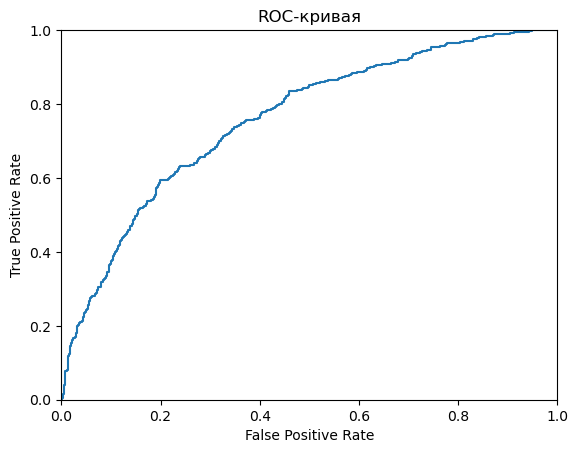

In [12]:
# обучим модель на основе логической регрессии и определим насколько хорошо она позволяет предсказывать целевой признак 
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Матрица ошибок:')
print(confusion_matrix(target_valid, predicted_valid))
print('Точность: ', precision_score(target_valid, predicted_valid))
print('Полнота: ', recall_score(target_valid, predicted_valid))
print('F1-мера: ', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');


Классификационная модель на основе логической регрессии не позволяет точно и в полной мере предсказывать останется или уйдет клиент из банка (значение F1-меры составляет 0,3).

In [13]:
# попробуем построить клссификационную модель на основе решающего дерева и найти ее оптимальные параметры
for depth in range(1, 15):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('max_depth =', depth, ':', end=' ')
    print(f1_score(target_valid, predicted_valid))
    

max_depth = 1 : 0.0
max_depth = 2 : 0.5217391304347825
max_depth = 3 : 0.4234875444839857
max_depth = 4 : 0.5528700906344411
max_depth = 5 : 0.5406249999999999
max_depth = 6 : 0.5696969696969697
max_depth = 7 : 0.5320813771517998
max_depth = 8 : 0.5435114503816794
max_depth = 9 : 0.5722543352601155
max_depth = 10 : 0.5388888888888889
max_depth = 11 : 0.5132978723404256
max_depth = 12 : 0.5019710906701709
max_depth = 13 : 0.5064599483204134
max_depth = 14 : 0.5174129353233831


Наилучший результат по метрике F1-мера показывает модель решающего дерева с максимальной глубиной равной 6. Однако достигнутое значение F1-меры (0,576) меньше целевого (0,59).

AUC_ROC:  0.8164631712023421


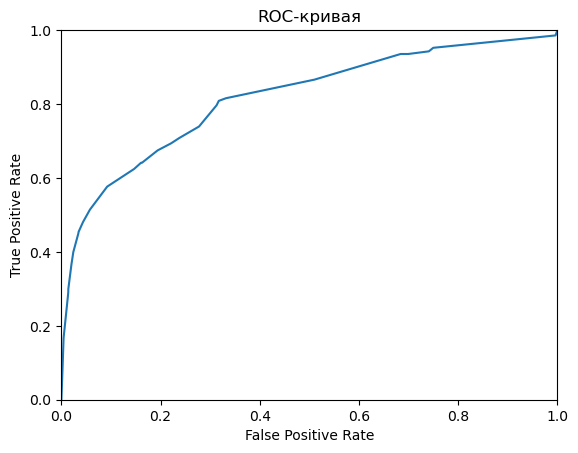

In [14]:
# построим ROC-кривую и найдем полощадь под ней для модели решающего дерева с максимальной глубиной 6
model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');

In [15]:
# построим модель на основе алгоритма случайного леса и найдем ее оптимальные параметры
for est in range(1, 21):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=7)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('n_extimators =', est, ':', end=' ')
    print(f1_score(target_valid, predicted_valid)) 

n_extimators = 1 : 0.4961948249619483
n_extimators = 2 : 0.4969512195121951
n_extimators = 3 : 0.5007874015748032
n_extimators = 4 : 0.5285935085007728
n_extimators = 5 : 0.5575757575757576
n_extimators = 6 : 0.5418569254185692
n_extimators = 7 : 0.5592705167173253
n_extimators = 8 : 0.5617283950617283
n_extimators = 9 : 0.565284178187404
n_extimators = 10 : 0.5533230293663061
n_extimators = 11 : 0.5471406491499228
n_extimators = 12 : 0.541471048513302
n_extimators = 13 : 0.5603715170278637
n_extimators = 14 : 0.5555555555555556
n_extimators = 15 : 0.545171339563863
n_extimators = 16 : 0.5496894409937888
n_extimators = 17 : 0.5514018691588785
n_extimators = 18 : 0.5514018691588785
n_extimators = 19 : 0.5571205007824727
n_extimators = 20 : 0.5557299843014128


Найлучший результат по метрике F1-мера показывает модель случайного леса с числом деревьев 19 и максимальной глубиной 7. Однако наилучшее значение метрики меньше необходимого.

AUC_ROC:  0.8473186687555575


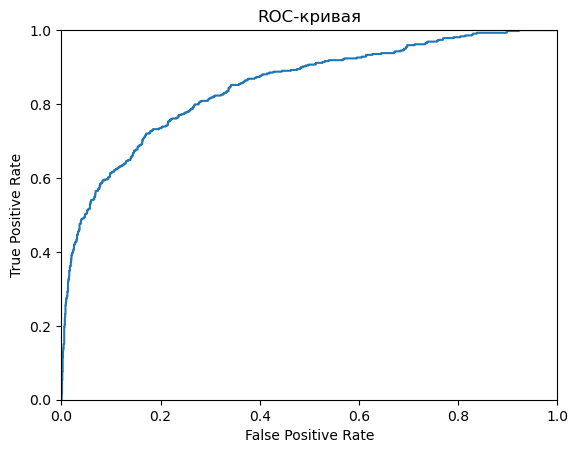

In [16]:
# построим ROC-кривую и найдем полощадь под ней для модели случайного леса с количеством деревьев 19 и максимальной глубиной 7
model = RandomForestClassifier(random_state=12345, n_estimators=19, max_depth=7)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');

Вывод: Ни один из алгоритмов классификации не позволяет построить модель, которая будет достаточно точно и полно предсказывать целевой признак (значения метрики F1 ниже заданного порога).
Возможная причина такого результата - дисбаланс классов в обучающей выборке.

## Борьба с дисбалансом

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

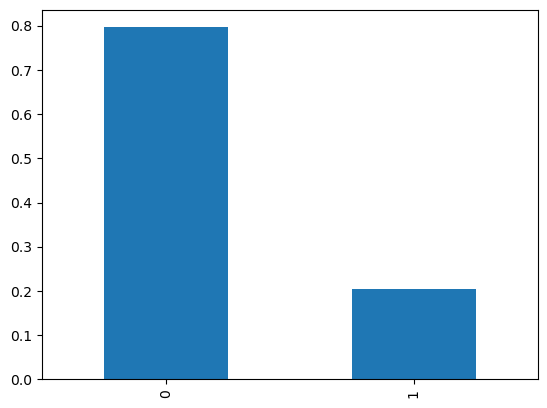

In [17]:
# определим соотношение классов в целевом признаке
class_frequency = data['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

В целевом признаке выявлен существенный дисбаланс классов.

Точность:  0.3784860557768924
Полнота:  0.6818181818181818
F1-мера:  0.48676345004269855
AUC_ROC:  0.7633469232211663


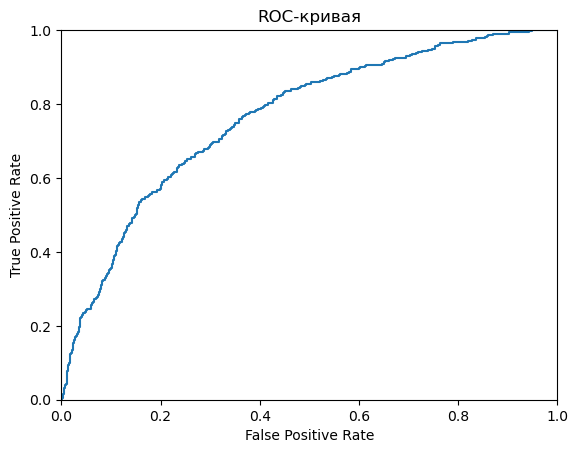

In [18]:
# обучим модель логической регрессии с учетом дисбаланса классов
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('Точность: ', precision_score(target_valid, predicted_valid))
print('Полнота: ', recall_score(target_valid, predicted_valid))
print('F1-мера: ', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');

Метрика F1-мера улучшилась с 0,3 до 0,5 при учете дисбаланса классов. 

Точность:  0.5258620689655172
Полнота:  0.7296650717703349
F1-мера:  0.6112224448897795
AUC_ROC:  0.8436469794760434


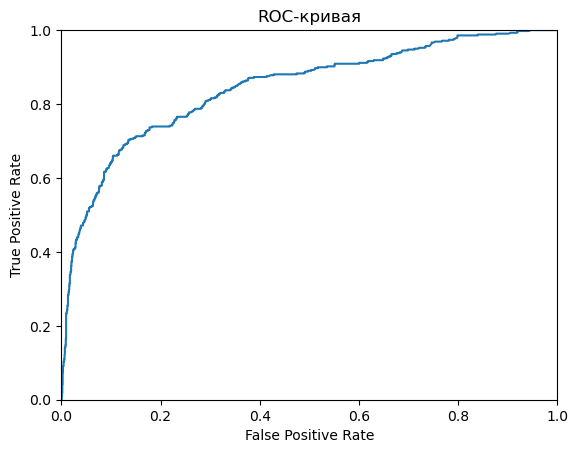

In [19]:
# попробуем увеличить частоту встречаемости редкого класса в обучающей выборке техникой upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

# обучим модель на увеличенной выборке
#model = LogisticRegression(random_state=12345, solver='liblinear')
#model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=5)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print('Точность: ', precision_score(target_valid, predicted_valid))
print('Полнота: ', recall_score(target_valid, predicted_valid))
print('F1-мера: ', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');

Техника увеличения выборки за счет увеличения частоты втречаемости редкого класса позволяет построить модели, обладающие более высокой точностью и полнотой предсказаний по сравнению с моделью, которая обучалась на исходной выборке.

Точность:  0.5952890792291221
Полнота:  0.6650717703349283
F1-мера:  0.6282485875706215
AUC_ROC:  0.8436250521718618


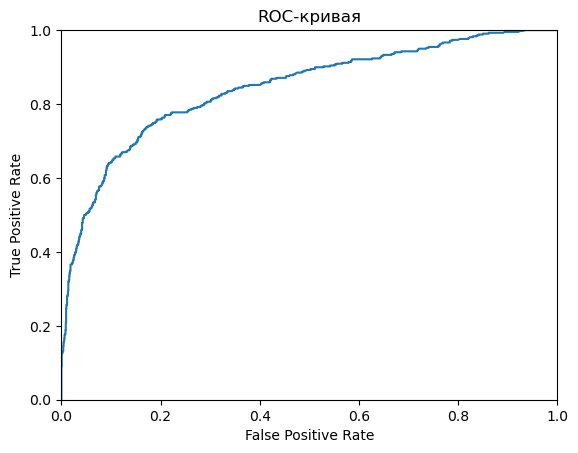

In [20]:
# применим технику downsampling с целью уменьшить частоту встречаемости доминирующего класса
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)]+[features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]+[target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.35)

# обучим модель на уменьшенной выборке
#model = LogisticRegression(random_state=12345, solver='liblinear')
#model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=5)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('Точность: ', precision_score(target_valid, predicted_valid))
print('Полнота: ', recall_score(target_valid, predicted_valid))
print('F1-мера: ', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');

Техника уменьшения выборки позволяет улучшить качество моделей. Модель классификации на основе случайного леса показывает наилучшие результаты.

Порог = 0.00 | Точность = 0.209, Полнота = 1.000, F1-мера = 0.346
Порог = 0.05 | Точность = 0.216, Полнота = 1.000, F1-мера = 0.355
Порог = 0.10 | Точность = 0.275, Полнота = 0.931, F1-мера = 0.424
Порог = 0.15 | Точность = 0.381, Полнота = 0.844, F1-мера = 0.525
Порог = 0.20 | Точность = 0.481, Полнота = 0.737, F1-мера = 0.582
Порог = 0.25 | Точность = 0.574, Полнота = 0.629, F1-мера = 0.600
Порог = 0.30 | Точность = 0.646, Полнота = 0.572, F1-мера = 0.607
Порог = 0.35 | Точность = 0.719, Полнота = 0.522, F1-мера = 0.605
Порог = 0.40 | Точность = 0.770, Полнота = 0.464, F1-мера = 0.579
Порог = 0.45 | Точность = 0.797, Полнота = 0.423, F1-мера = 0.553
Порог = 0.50 | Точность = 0.827, Полнота = 0.378, F1-мера = 0.519
Порог = 0.55 | Точность = 0.878, Полнота = 0.292, F1-мера = 0.438


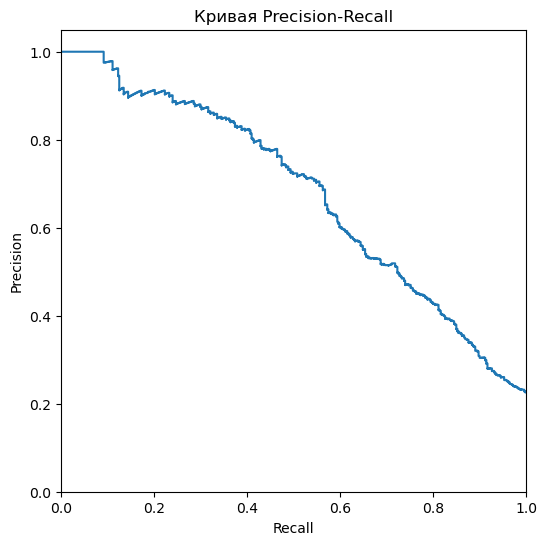

In [21]:
# попробуем найти оптимальной соотношения между классами для классификационной модели

#model = LogisticRegression(random_state=12345, solver='liblinear')
model = RandomForestClassifier(random_state=12345,n_estimators=20, max_depth=5)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.6, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Оптимальное соотношение между классами для модели случайного леса достигает при пороговом значении от 0,25 до 0,35.

## Тестирование модели

Точность:  0.5543710021321961
Полнота:  0.6146572104018913
F1-мера:  0.5829596412556054
AUC_ROC:  0.8436250521718618


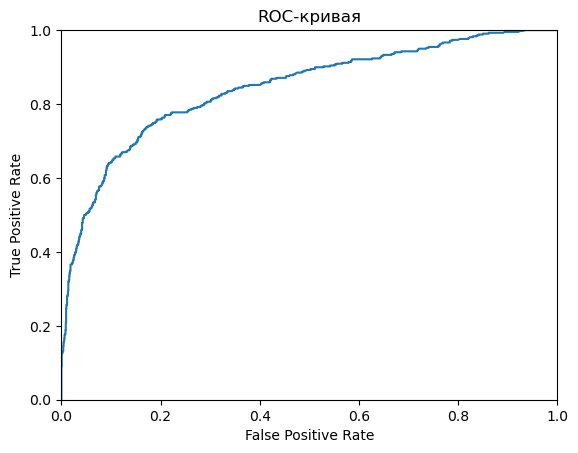

In [22]:
# выполним тестирование модели случайного леса с количеством деревьев 20 и максимальной глучиной 5 на тестовой выборке
model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=5)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)

print('Точность: ', precision_score(target_test, predicted_test))
print('Полнота: ', recall_score(target_test, predicted_test))
print('F1-мера: ', f1_score(target_test, predicted_test))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC_ROC: ', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');

Модель случайного леса с количеством деревьев 20 и максимальной глубиной 5, обученная на уменьшенной выборке, при тестировании достигает целевого значения метрики F1-меры (>0,59). Площадь под ROC-кривой равна 0,85, что указывает на досточно хорошее качество модели.

Вывод:

В проекте решалась задача построения качественной классификационной модели, которая позволила бы достаточно точно предсказать уйдет ли клиент из банка. Для решения поставленной задачи исходные данные были подготовлены для применения алгоритмов обучения и разделены на признаки и целевой признак, а также обучающую, валидационную и тестовую выборки. Были исследованы модели логической регрессии, решающего дерева и случайного леса с целью поиска оптимальной модели. Однако ни одна из моделей не достигала целевых показалей качества. Причиной недостаточного качества обучения моделей оказался дисбаланс классов целевого признака (соотношение 80:20). Были применены различные методы, позволяющие сбалансировать классы и устранить существенное преобладание одного из них. Устранение дисбаланса позволило улучшить качество моделей, а также найти оптимальную модель и ее параметры. Найлучшей оказалась модель случайного леса с количесвом деревьев 20 и максимальной глубиной 5, которая показала высокий резльтат качества работы на тестовой выборке. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*